# **LOADING DATA-SET FROM KAGGLE**

In [ ]:
from google.colab import files
import os
files = files.upload()

root = [a.name for a in os.scandir("/root")]
if ".kaggle" not in root:
  os.mkdir("/root/.kaggle")

for filename in files.keys():
  if filename != "kaggle.json":
    print(f"Deleted {filename}")
    os.remove(filename)

!mv "kaggle.json" "/root/.kaggle/"
!chmod 600 "/root/.kaggle/kaggle.json"

Saving kaggle.json to kaggle.json


In [ ]:
root = [a.name for a in os.scandir("/root/.kaggle")]

assert "kaggle.json" in root, False
print(True)

True


In [ ]:
import kaggle

kaggle.api.authenticate()

In [ ]:
kaggle.api.dataset_download_files("tsiaras/uk-road-safety-accidents-and-vehicles/3",unzip=True,quiet=False)
os.rename("./Accident_Information.csv", "./kaggle_accidents.csv")
os.rename("./Vehicle_Information.csv", "./kaggle_vehicles.csv")

100%|██████████| 142M/142M [00:01<00:00, 83.3MB/s]


<font color = 'lightgreen' ><u>**Importing Libraries**</u></font>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



<font color = 'lightgreen' ><u>**Loading Data-set**</u></font>


In [ ]:
accidents_df = pd.read_csv("./kaggle_accidents.csv", low_memory=False)
vehicles_df = pd.read_csv("./kaggle_vehicles.csv", low_memory=False, encoding="latin-1")

# **EXPLORING DATA-SETS**


**Reading the two datasets**

In [ ]:
accidents_df.head(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,None,2005-01-14,Friday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:35,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,Fine no high winds,2005,No


In [ ]:
vehicles_df.head(10)

,Accident_Index,Age_Band_of_Driver,Age_of_Vehicle,Driver_Home_Area_Type,Driver_IMD_Decile,Engine_Capacity_.CC.,Hit_Object_in_Carriageway,Hit_Object_off_Carriageway,Journey_Purpose_of_Driver,Junction_Location,...,Skidding_and_Overturning,Towing_and_Articulation,Vehicle_Leaving_Carriageway,Vehicle_Location.Restricted_Lane,Vehicle_Manoeuvre,Vehicle_Reference,Vehicle_Type,Was_Vehicle_Left_Hand_Drive,X1st_Point_of_Impact,Year
0,200401BS00001,26 - 35,3.0,Urban area,4.0,1588.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
1,200401BS00002,26 - 35,NaN,Urban area,3.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,109,Data missing or out of range,Front,2004
2,200401BS00003,26 - 35,4.0,Data missing or out of range,NaN,998.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
3,200401BS00003,66 - 75,NaN,Data missing or out of range,NaN,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,2,109,Data missing or out of range,Front,2004
4,200401BS00004,26 - 35,1.0,Urban area,4.0,124.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Front,2004
5,200401BS00004,36 - 45,10.0,Data missing or out of range,NaN,1781.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,U-turn,2,109,Data missing or out of range,Offside,2004
6,200401BS00009,26 - 35,NaN,Urban area,4.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,Skidded,No tow/articulation,Did not leave carriageway,0.0,Going ahead other,1,Motorcycle 125cc and under,Data missing or out of range,Did not impact,2004
7,200401BS00010,36 - 45,NaN,Urban area,8.0,NaN,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Front,2004
8,200401BS00012,46 - 55,3.0,Data missing or out of range,NaN,2685.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Slowing or stopping,1,109,Data missing or out of range,Back,2004
9,200401BS00013,26 - 35,4.0,Urban area,6.0,2300.0,None,None,Data missing or out of range,Data missing or out of range,...,None,No tow/articulation,Did not leave carriageway,0.0,Turning right,1,109,Data missing or out of range,Offside,2004


**Getting info about the attributes of the datasets**

In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [ ]:
print(f"Dimension of accidents dataset is : {accidents_df.shape}")

Dimension of accidents dataset is : (2047256, 34)


There are 34 attributes in our accidents dataset , with each feild either having number or text data types

In [ ]:
vehicles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2177205 entries, 0 to 2177204
Data columns (total 24 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   Accident_Index                    object 
 1   Age_Band_of_Driver                object 
 2   Age_of_Vehicle                    float64
 3   Driver_Home_Area_Type             object 
 4   Driver_IMD_Decile                 float64
 5   Engine_Capacity_.CC.              float64
 6   Hit_Object_in_Carriageway         object 
 7   Hit_Object_off_Carriageway        object 
 8   Journey_Purpose_of_Driver         object 
 9   Junction_Location                 object 
 10  make                              object 
 11  model                             object 
 12  Propulsion_Code                   object 
 13  Sex_of_Driver                     object 
 14  Skidding_and_Overturning          object 
 15  Towing_and_Articulation           object 
 16  Vehicle_Leaving_Carriageway       ob

In [ ]:
print(f"Dimension of vehicles dataset is : {vehicles_df.shape}")

Dimension of vehicles dataset is : (2177205, 24)


There are 24 attributes in our vehicles datset.

# **Information about the two datasets available on kaggle ->>**

1. Accident_Information.csv ➡


> Indented blockevery line in the file represents a unique traffic accident (identified by the Accident_Index column), featuring various properties related to the accident as columns. Date range: 2005-2017.

2. Vehicle_Information.csv.csv ➡

> Indented block every line in the file represents the involvement of a unique vehicle in a unique traffic accident, featuring various vehicle and passenger properties as columns. Date range: 2004-2016







Since Accident_Index in available in both the dataset and indicates unique accidetns we can set relation between the two datasets.

# **Exploring Accidents Dataset**

**From further research we can defined what each column of the accidents dataset means -->**



1.   Accident_Index: A unique identifier for each accident record.
2.   1st_Road_Class: The classification of the first road in the accident (e.g., motorway, A road, B road).
3. 1st_Road_Number: The road number of the first road involved in the accident.
4. 2nd_Road_Class: The classification of the second road in the accident.
5. 2nd_Road_Number: The road number of the second road involved in the accident.
6. Accident_Severity: The severity of the accident, categorized as fatal, serious, or slight.
7. Carriageway_Hazards: Any special conditions or hazards on the road at the time of the accident.Carriageway_Hazards: Any special conditions or hazards on the road at the time of the accident.
8. Date: The date of the accident.
9. Day_of_Week: The day of the week when the accident occurred.
10. Did_Police_Officer_Attend_Scene_of_Accident: Indicates whether a police officer attended the scene of the accident.
11. Junction_Control: Information about control at a junction, if applicable.
12. Junction_Detail: Details about the type of junction where the accident occurred.
13. Latitude: The geographical latitude of the accident location.
14. Latitude: The geographical latitude of the accident location.
15. Local_Authority_(District): The local authority district where the accident occurred.
16. Local_Authority_(Highway): The local authority responsible for the highway where the accident occurred.
17. Location_Easting_OSGR: The easting coordinate of the accident location in the Ordnance Survey National Grid.
18. Location_Northing_OSGR: The northing coordinate of the accident location in the Ordnance Survey National Grid.
19. Longitude: The geographical longitude of the accident location.
20. LSOA_of_Accident_Location: Lower Layer Super Output Area of the accident location.
21. Number_of_Casualties: The total number of casualties (injuries and fatalities) in the accident.
22. Number_of_Vehicles: The total number of vehicles involved in the accident.
23. Pedestrian_Crossing-Human_Control: Information about human control at pedestrian crossings.
24. Pedestrian_Crossing-Physical_Facilities: Information about physical facilities at pedestrian crossings.
25. Police_Force: The police force involved in handling the accident.
26. Road_Surface_Conditions: The road surface conditions at the time of the accident (e.g., dry, wet, snow).
27. Road_Type: The type of road where the accident occurred (e.g., single carriageway, dual carriageway).
28. Special_Conditions_at_Site: Any special conditions at the accident site.
29. Speed_limit: The speed limit on the road where the accident occurred.
30. Time: The time of the accident.
31. Urban_or_Rural_Area: Indicates whether the accident occurred in an urban or rural area.
32. Weather_Conditions: The weather conditions at the time of the accident.
33. Year: The year in which the accident occurred.
34. InScotland: Indicates whether the accident occurred in Scotland.












In [ ]:
accidents_df.head(10)

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,...,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No
5,200501BS00006,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-11,Tuesday,1.0,...,Metropolitan Police,Wet or damp,Single carriageway,Oil or diesel,30.0,12:40,Urban,Raining no high winds,2005,No
6,200501BS00007,C,0.0,Unclassified,0.0,Slight,None,2005-01-13,Thursday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,20:40,Urban,Fine no high winds,2005,No
7,200501BS00009,A,315.0,NaN,0.0,Slight,None,2005-01-14,Friday,1.0,...,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:35,Urban,Fine no high winds,2005,No
8,200501BS00010,A,3212.0,B,304.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,22:43,Urban,Fine no high winds,2005,No
9,200501BS00011,B,450.0,C,0.0,Slight,None,2005-01-15,Saturday,1.0,...,Metropolitan Police,Dry,Single carriageway,None,30.0,16:00,Urban,Fine no high winds,2005,No


In [ ]:
accidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2047256 entries, 0 to 2047255
Data columns (total 34 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   Accident_Index                               object 
 1   1st_Road_Class                               object 
 2   1st_Road_Number                              float64
 3   2nd_Road_Class                               object 
 4   2nd_Road_Number                              float64
 5   Accident_Severity                            object 
 6   Carriageway_Hazards                          object 
 7   Date                                         object 
 8   Day_of_Week                                  object 
 9   Did_Police_Officer_Attend_Scene_of_Accident  float64
 10  Junction_Control                             object 
 11  Junction_Detail                              object 
 12  Latitude                                     float64
 13  Light_Condit

In [ ]:
print(f'Dimension of the data_set : {accidents_df.shape}\n\n')


print(f'Null values in each column : ')
accidents_df.isnull().sum()

Dimension of the data_set : (2047256, 34)


Null values in each column : 


Accident_Index                                      0
1st_Road_Class                                      0
1st_Road_Number                                     2
2nd_Road_Class                                 844272
2nd_Road_Number                                 17593
Accident_Severity                                   0
Carriageway_Hazards                                 0
Date                                                0
Day_of_Week                                         0
Did_Police_Officer_Attend_Scene_of_Accident       278
Junction_Control                                    0
Junction_Detail                                     0
Latitude                                          174
Light_Conditions                                    0
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
Location_Easting_OSGR                             164
Location_Northing_OSGR                            164
Longitude                   

 **Cleaning our dataset**

Removing the fields with maximum null values

In [ ]:
accidents = accidents_df.drop(columns=['2nd_Road_Class','2nd_Road_Number','LSOA_of_Accident_Location']).copy(deep=True)

Dropping rows with null values

In [ ]:
accidents.dropna(axis=0,how='any',inplace=True)

Final dimension of our accidents data-set after data-cleaning

In [ ]:
print(f'Dimension of the data_set : {accidents.shape}\n')
print(f'No. of Null values  : {accidents.isnull().values.sum()}')


Dimension of the data_set : (2042568, 31)

No. of Null values  : 0


In [ ]:
accidents.duplicated().sum()

0

**Checking for unique values in each field**

In [ ]:
for col in accidents.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {accidents[col].nunique()}")
    print(accidents[col].value_counts())
    print()

Unique values in Accident_Index: 2042568
200501BS00001    1
201301JC30388    1
201301JC30404    1
201301JC30403    1
201301JC30402    1
                ..
200842I477812    1
200842I477712    1
200842I477512    1
200842I477412    1
2017984122617    1
Name: Accident_Index, Length: 2042568, dtype: int64

Unique values in 1st_Road_Class: 6
A               924303
Unclassified    602633
B               257701
C               174471
Motorway         77977
A(M)              5483
Name: 1st_Road_Class, dtype: int64

Unique values in Accident_Severity: 3
Slight     1730276
Serious     285957
Fatal        26335
Name: Accident_Severity, dtype: int64

Unique values in Carriageway_Hazards: 7
None                                               2005414
Other object on road                                 16080
Any animal in carriageway (except ridden horse)      10406
Pedestrian in carriageway - not injured               4682
Previous accident                                     3104
Vehicle load on roa

**Correlation analysis among the attributes**

<ipython-input-29-92ab133ee5a1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(accidents.corr(), annot=True, cmap='coolwarm', fmt=".2f")


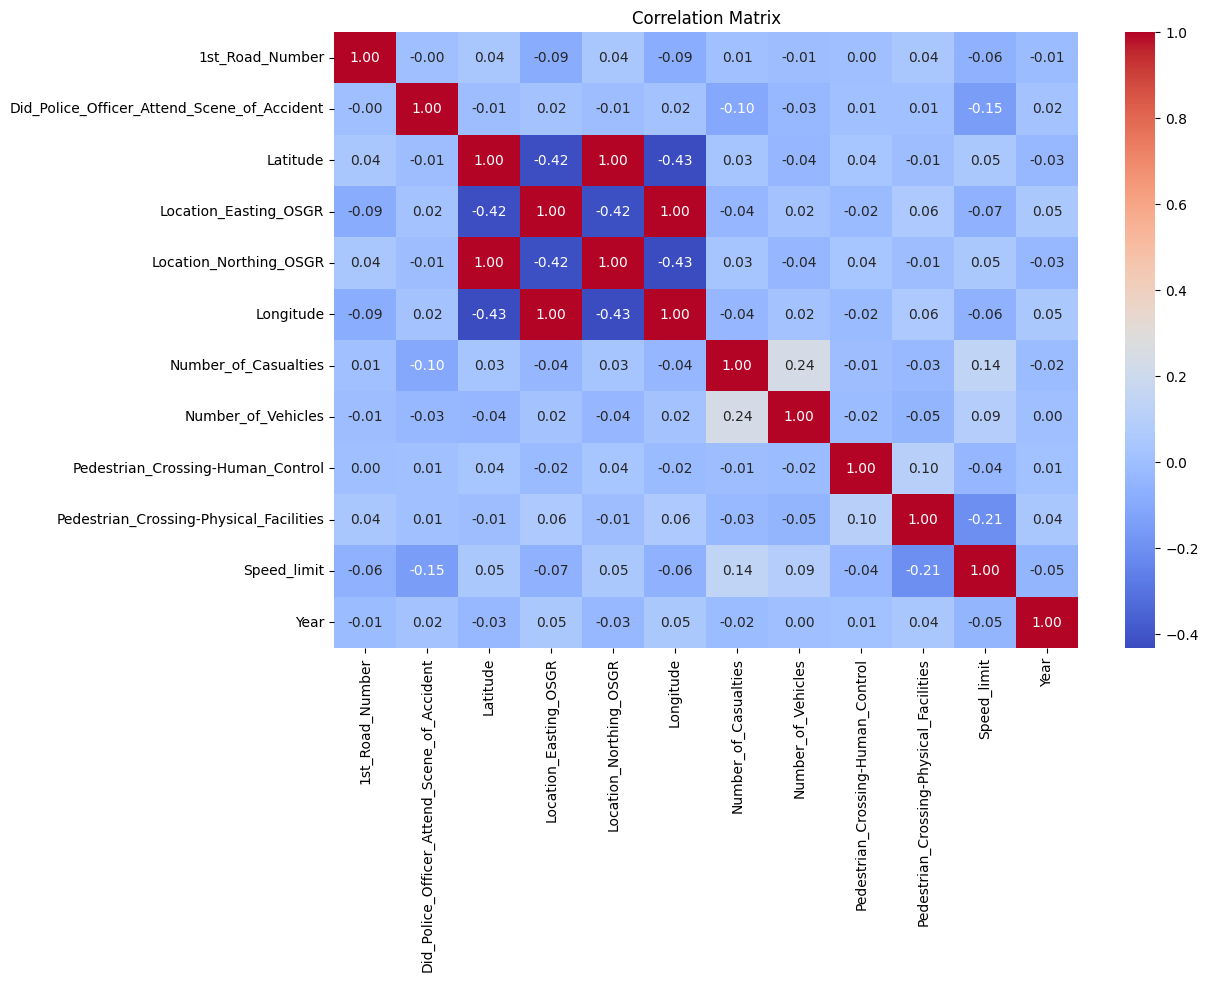

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(accidents.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

We can't find any strong relation among the featues of our interest.

**Lets try analyzing each attribute thorougly**

Analiyzing how accidents severity is distributed

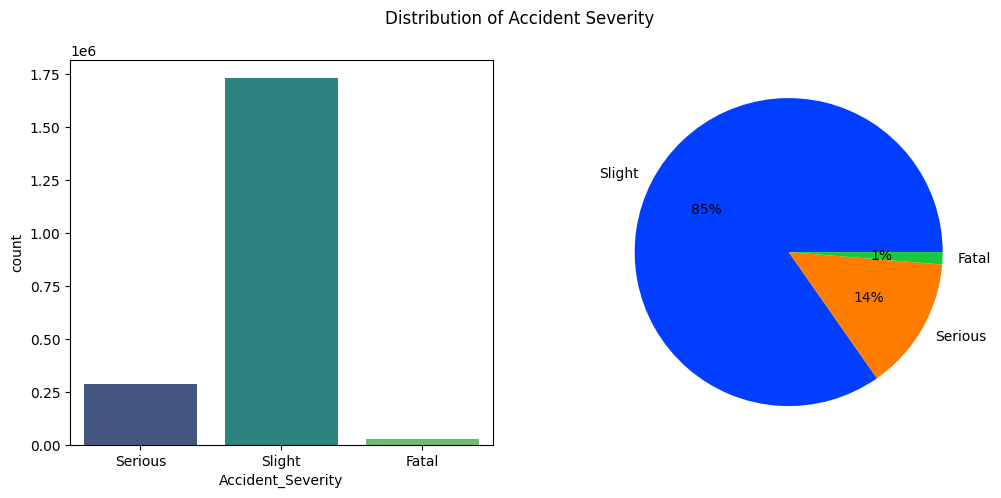

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distribution of Accident Severity')
sns.countplot(ax=axes[0],x='Accident_Severity', data=accidents, palette='viridis')
palette_color = sns.color_palette('bright')
acc = accidents['Accident_Severity'].value_counts()
lab = ['Slight','Serious','Fatal']
axes[1].pie(acc, labels=lab, colors=palette_color, autopct='%.0f%%')
fig.show()


Across the years around 2.5cr serious accidents happend in UK with around 17.5cr slight accidents.

**Lets see how accident conditions has varied around the years**

<ipython-input-31-1f3fb5dd99d7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  acc = accidents.groupby('Year').sum()


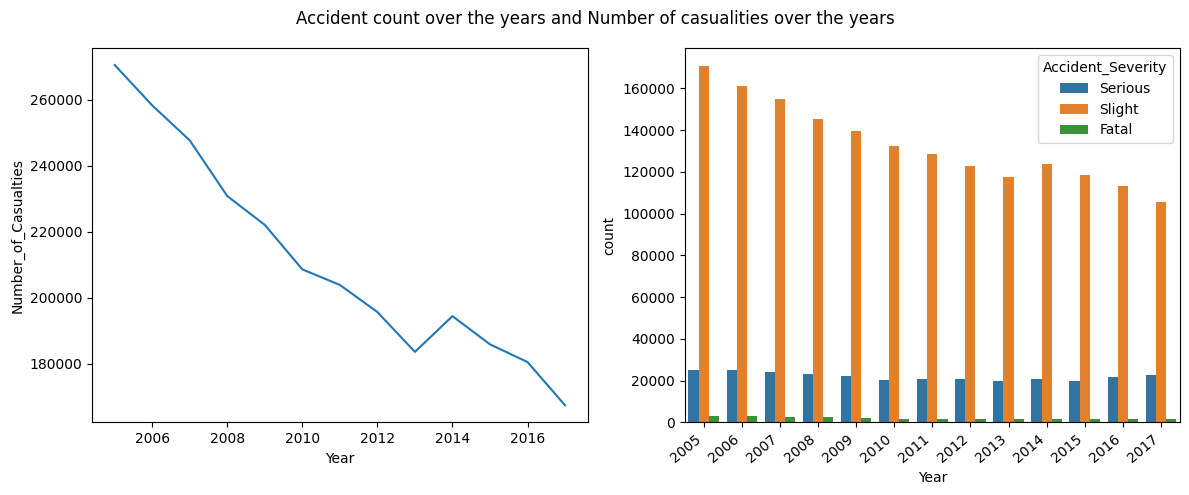

In [ ]:
acc = accidents.groupby('Year').sum()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Accident count over the years and Number of casualities over the years')
sns.lineplot(ax=axes[0],data=acc,x='Year',y='Number_of_Casualties')
ax = sns.countplot(ax=axes[1],data=accidents_df,x="Year",hue = "Accident_Severity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
fig.show()

Though there is a significant decrease in the number of slight accidents over the years , but still the amount of serious accidents has stayed somewhat uniform.

# **Lets try understanding how the severity of accidents depends upon weather conditions**

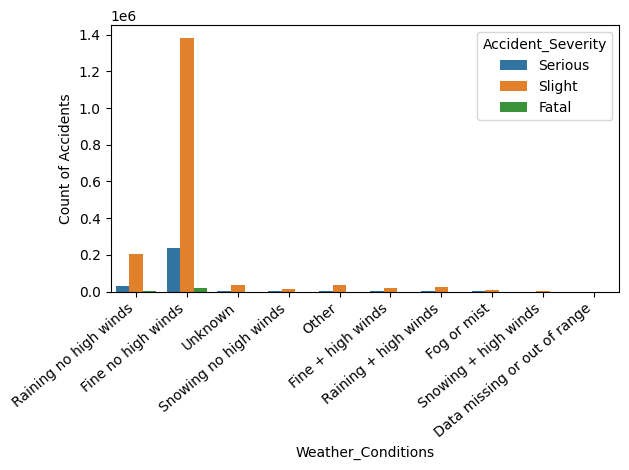

In [ ]:
ax = sns.countplot(accidents_df,x="Weather_Conditions",hue = "Accident_Severity" )
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set(xlabel='Weather_Conditions', ylabel='Count of Accidents')
plt.tight_layout()
plt.show()

We can observe that most serious accidents occur when the whether was fine with no high winds and then when it was raining . But there were few serious accidents comapritively though. Hence we cant blame bad whether itself as a major cause of accidents.

In [ ]:
df = accidents.copy()  # Creating a copy to avoid modifying the original data

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract year and month from the 'Date' column
df['Year'] = df['Date'].dt.year

In [ ]:
filtered_df = df[(df['Weather_Conditions'] == 'Raining no high winds')  & (df['Year'] >= (df['Year'].max() - 5))]

accidents_by_year = filtered_df.groupby('Year').size()

print('Number of accidents due to raining and no wind for each of the last 5 years:')
print(accidents_by_year)

accidents_by_year_type = filtered_df.groupby(['Year', 'Accident_Severity']).size().unstack(fill_value=0)

print('\n\nNumber of accidents due to raining and no wind for each type of accident for each of the last 5 years:')
print(accidents_by_year_type)

Number of accidents due to raining and no wind for each of the last 5 years:
Year
2012    20116
2013    14562
2014    17665
2015    15541
2016    14442
2017    14091
dtype: int64


Number of accidents due to raining and no wind for each type of accident for each of the last 5 years:
Accident_Severity  Fatal  Serious  Slight
Year                                     
2012                 178     2562   17376
2013                 142     1829   12591
2014                 154     2227   15284
2015                 164     2080   13297
2016                 170     2197   12075
2017                 152     2321   11618


There is a gradual decrease in number of accidents over the past 5 years. Over last three years there is a slight increase in number of serious accidents during rainy season.

**Lets see how road conditions affect number of accidents**

<ipython-input-35-8952f6a8bd59>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
<ipython-input-35-8952f6a8bd59>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year
<ipython-input-35-8952f6a8bd59>:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which sh

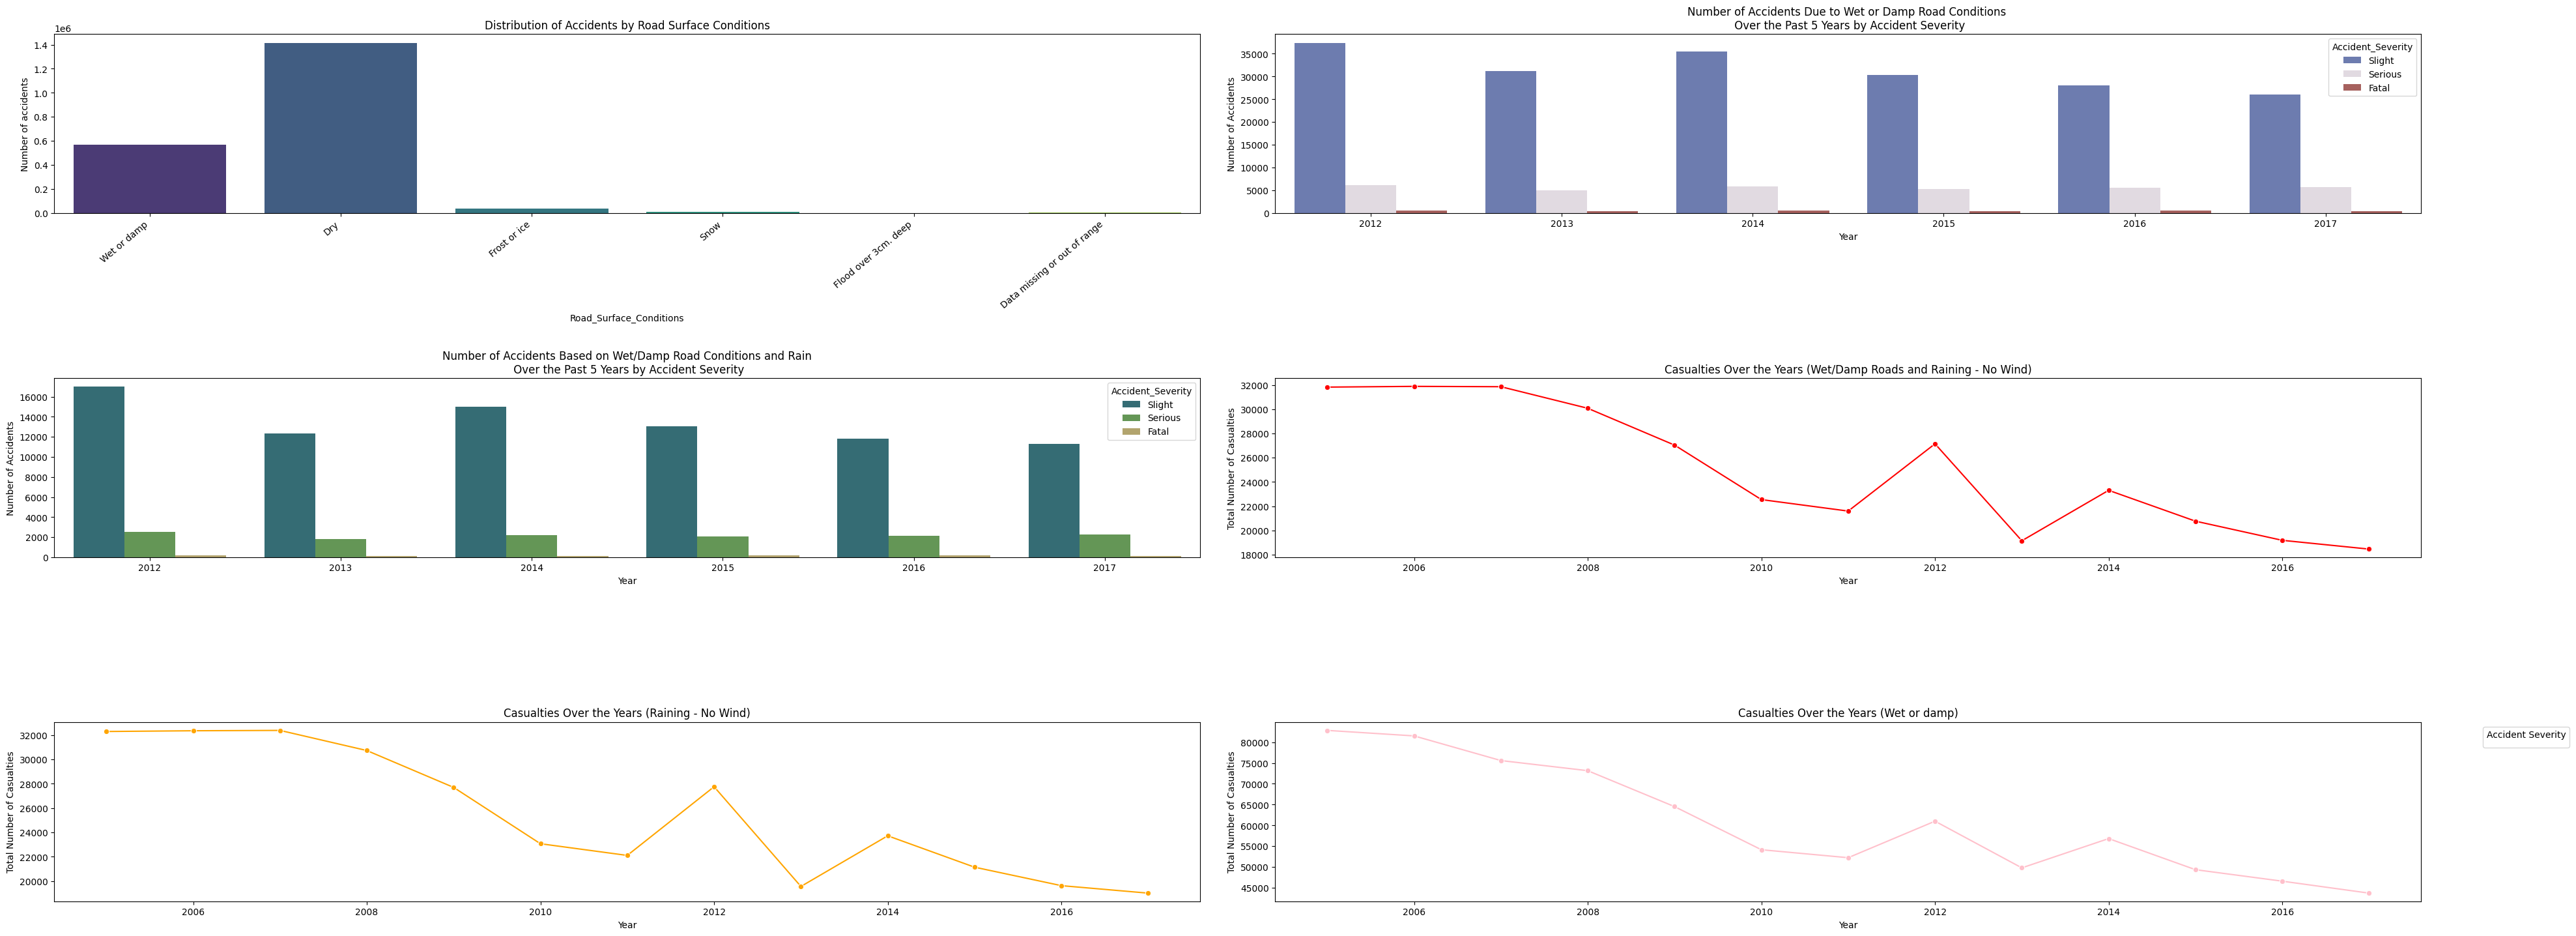

In [ ]:
filtered_df = df[(df['Road_Surface_Conditions'] == 'Wet or damp')  & (df['Year'] >= (df['Year'].max() - 5))]
filtered_df_ = df[((df['Road_Surface_Conditions'].isin(['Wet or damp'])) & (df['Weather_Conditions'] == 'Raining no high winds')) & (df['Year'] >= (df['Year'].max() - 5))]
filtered_df__ = df[((df['Road_Surface_Conditions'].isin(['Wet or damp'])) & (df['Weather_Conditions'] == 'Raining no high winds'))]
casualties_by_year = filtered_df__.groupby('Year')['Number_of_Casualties'].sum().reset_index()


fig, axes = plt.subplots(3, 2, figsize=(40, 15))

ax = sns.countplot(ax=axes[0,0],x='Road_Surface_Conditions', data=df, palette='viridis')
ax.set_title('Distribution of Accidents by Road Surface Conditions')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_ylabel('Number of accidents')

ax1=sns.countplot(ax=axes[0,1],x='Year', hue='Accident_Severity', data=filtered_df, palette='twilight_shifted', dodge=True)
ax1.set_title('Number of Accidents Due to Wet or Damp Road Conditions \n Over the Past 5 Years by Accident Severity')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Accidents')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')



ax2=sns.countplot(ax=axes[1,0],x='Year', hue='Accident_Severity', data=filtered_df_, palette='gist_earth', dodge=True)
ax2.set_title('Number of Accidents Based on Wet/Damp Road Conditions and Rain\n Over the Past 5 Years by Accident Severity')
ax2.set_xlabel('Year')
ax2.set_ylabel('Number of Accidents')
plt.legend(title='Accident Severity', bbox_to_anchor=(1.05, 1), loc='upper left')


ax3=sns.lineplot(ax=axes[1,1],x='Year', y='Number_of_Casualties', data=casualties_by_year, marker='o', color='red')
ax3.set_title('Casualties Over the Years (Wet/Damp Roads and Raining - No Wind)')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total Number of Casualties')

filtered_df = df[(df['Weather_Conditions'] == 'Raining no high winds')]
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Year'] = filtered_df['Date'].dt.year
filtered_df=filtered_df.groupby('Year').sum()
ax4=sns.lineplot(ax=axes[2,0],x='Year', y='Number_of_Casualties', data=filtered_df, marker='o', color='orange')
ax4.set_title('Casualties Over the Years (Raining - No Wind)')
ax4.set_xlabel('Year')
ax4.set_ylabel('Total Number of Casualties')

filtered_df = df[(df['Road_Surface_Conditions'] == 'Wet or damp')]
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['Year'] = filtered_df['Date'].dt.year
filtered_df=filtered_df.groupby('Year').sum()
ax5=sns.lineplot(ax=axes[2,1],x='Year', y='Number_of_Casualties', data=filtered_df, marker='o', color='pink')
ax5.set_title('Casualties Over the Years (Wet or damp)')
ax5.set_xlabel('Year')
ax5.set_ylabel('Total Number of Casualties')


fig.tight_layout(pad=3.0)
fig.show()


We can see a significant number of accidents due to wet and damp road conditions.

We again see a persistency in the number of serious accidents over the past 3 years due to wet and damp road , same can be said for rainy seasons.

Over a decade there is a drastic fall in number of casualities due to accidents .
This could be a sign of better road and traffic conditions. Also incresed personal awareness of people.


In [ ]:
total_casualties_by_year = df.groupby('Year')['Number_of_Casualties'].sum().reset_index()

# Filter the dataset for accidents based on wet or damp roads
wet_damp_df = df[df['Road_Surface_Conditions'].isin(['Wet or damp'])]

# Group by year and sum the total casualties due to wet and damp roads
casualties_wet_damp_by_year = wet_damp_df.groupby('Year')['Number_of_Casualties'].sum().reset_index()

rain_df = df[df['Weather_Conditions'].str.contains('Raining no high winds', case=False, na=False)]

# Group by year and sum the total casualties due to rain
casualties_rain_by_year = rain_df.groupby('Year')['Number_of_Casualties'].sum().reset_index()

# Merge the dataframes on the 'Year' column
merged_df = pd.merge(total_casualties_by_year, casualties_wet_damp_by_year, on='Year', suffixes=('_Total', '_Wet_Damp'))
merged_df = pd.merge(merged_df, casualties_rain_by_year, on='Year')
merged_df['% of casualities due to rain'] = (np.array(merged_df['Number_of_Casualties'])/np.array(merged_df['Number_of_Casualties_Total']))*100
merged_df['% of casualities due to wet and damp road'] = (np.array(merged_df['Number_of_Casualties_Wet_Damp'])/np.array(merged_df['Number_of_Casualties_Total']))*100


percentage_df = merged_df[['Year', 'Number_of_Casualties_Total', 'Number_of_Casualties_Wet_Damp','Number_of_Casualties','% of casualities due to rain','% of casualities due to wet and damp road']]
# Print the merged dataframe
percentage_df.head(12)


,Year,Number_of_Casualties_Total,Number_of_Casualties_Wet_Damp,Number_of_Casualties,% of casualities due to rain,% of casualities due to wet and damp road
0,2005,270552,82813,32303,11.939664,30.608903
1,2006,258329,81495,32364,12.528210,31.546981
2,2007,247713,75575,32393,13.076827,30.509097
3,2008,230853,73144,30738,13.314967,31.684232
4,2009,222118,64520,27704,12.472650,29.047623
5,2010,208639,54165,23069,11.056897,25.961110
6,2011,203937,52251,22107,10.840112,25.621148
7,2012,195718,61020,27759,14.183161,31.177510
8,2013,183657,49813,19554,10.647021,27.122843
9,2014,194477,56841,23722,12.197843,29.227621


We can see a major constituent of deaths are due to wet and damp road conditions.

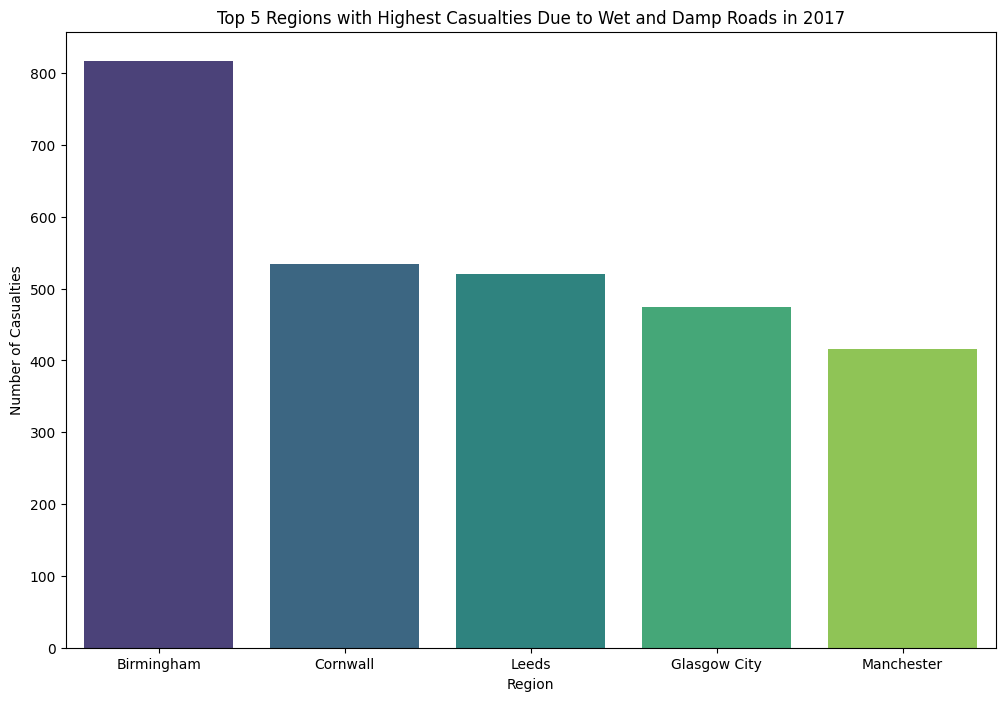

In [ ]:
wet_damp_2017_df = df[(df['Year'] == 2017) & df['Road_Surface_Conditions'].isin(['Wet or damp'])]

# Group by region and sum the total casualties due to wet and damp roads
casualties_by_region = wet_damp_2017_df.groupby('Local_Authority_(District)')['Number_of_Casualties'].sum().reset_index()

# Sort the dataframe by casualties in descending order
casualties_by_region = casualties_by_region.sort_values(by='Number_of_Casualties', ascending=False)

# Select the top 5 regions
top5_regions = casualties_by_region.head(5)

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Local_Authority_(District)', y='Number_of_Casualties', data=top5_regions, palette='viridis')
plt.title('Top 5 Regions with Highest Casualties Due to Wet and Damp Roads in 2017')
plt.xlabel('Region')
plt.ylabel('Number of Casualties')
plt.show()

**Density of accidents based on locations**

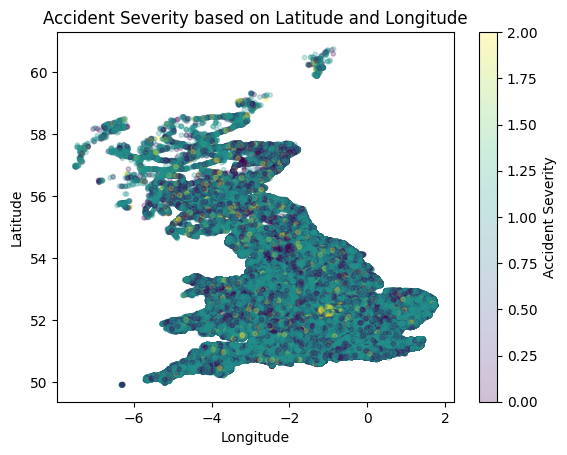

In [ ]:
accidents['Accident_Severity_Numeric'] = accidents['Accident_Severity'].map({'Serious': 0, 'Slight': 1 , 'Fatal':2})
plt.scatter(accidents['Longitude'], accidents['Latitude'], c=accidents['Accident_Severity_Numeric'], alpha=0.25 , s = 10)
plt.title('Accident Severity based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Accident Severity')
plt.show()

# **Distribution of accidents based on weak days**

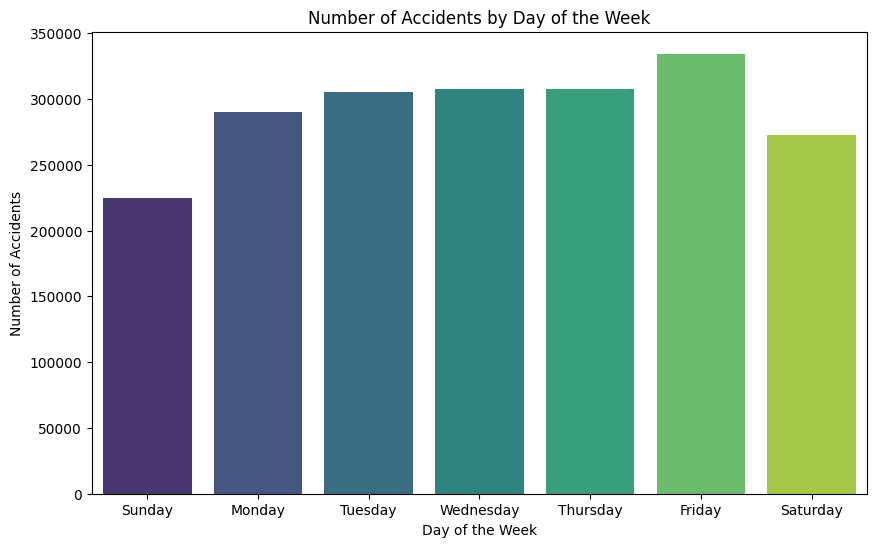

In [ ]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']


accidents_by_day = accidents['Day_of_Week'].value_counts().loc[day_order]


plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis')
plt.title('Number of Accidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.show()

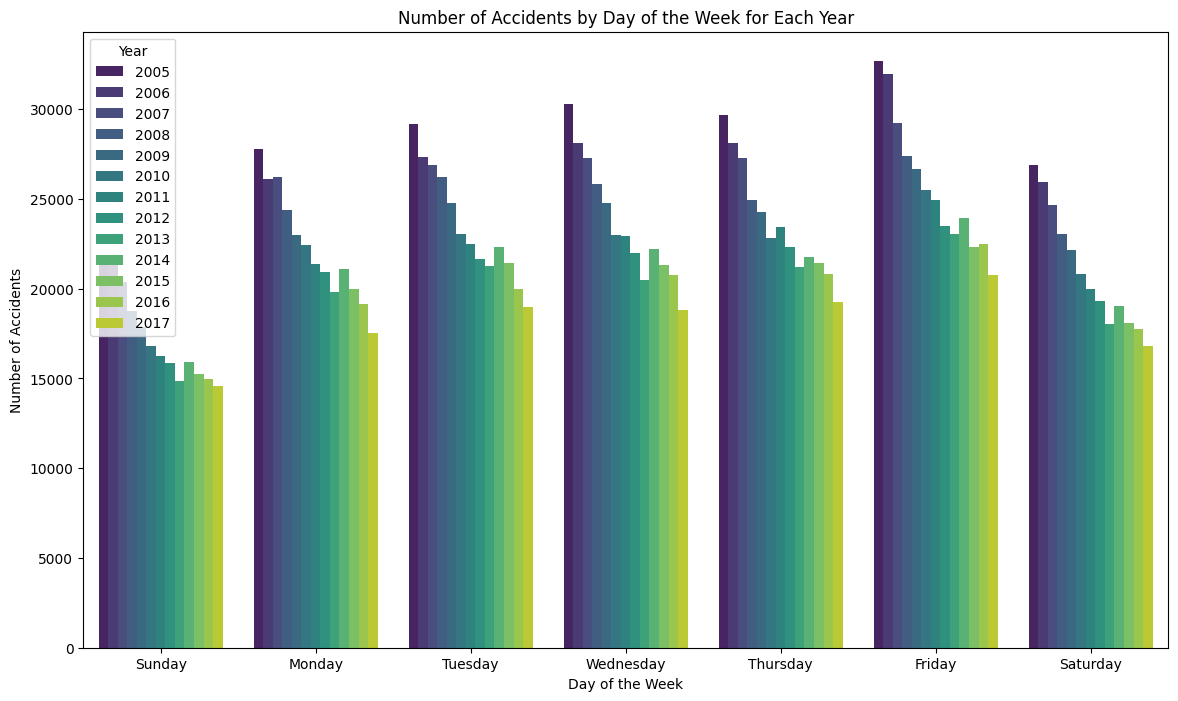

In [ ]:
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

# Plot the number of accidents by day of the week for each year
plt.figure(figsize=(14, 8))
sns.countplot(x='Day_of_Week', data=df, order=day_order, hue='Year', palette='viridis')
plt.title('Number of Accidents by Day of the Week for Each Year')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.legend(title='Year')
plt.show()


**We can see a clear surge in the number of accidents oh the working days . There could be many possible reasons for it such as -->**


1. **Rush Hour Traffic**: Working days typically experience higher traffic volumes during rush hours when people are commuting to and from work.
The increased congestion and the rush to reach destinations may contribute to a higher likelihood of accidents.

2. **Work-related Stress**: People may experience stress and fatigue during working days, which could impact their concentration and reaction times while driving, potentially leading to an increased number of accidents.

3. **Business and Commercial Activity**: Working days are associated with increased business and commercial activities. More vehicles on the road, including commercial vehicles, may contribute to a higher probability of accidents.

4. **Different Road Users**: The composition of road users may differ between working days and Sundays. On working days, there may be more commuters, including those traveling for work-related purposes, while Sundays might have a higher proportion of recreational travelers.

5. **Weather Conditions**: Weather conditions, which can significantly impact road safety, might vary between working days and Sundays. For example, adverse weather conditions on specific working days could contribute to an increase in accidents.

6. **Enforcement Levels**: Levels of law enforcement and traffic management may vary between working days and weekends. Different enforcement patterns could influence driver behavior and, consequently, the number of accidents.

7. **Driver Behavior**: Driver behavior can be influenced by various factors, including stress, fatigue, and time pressures. These factors might be more pronounced on working days, leading to a higher likelihood of accidents.

8. **Public Transportation**: Availability and usage of public transportation may differ between working days and Sundays. On working days, more people might opt for private vehicles, increasing the overall traffic on the roads.

**It's important to conduct a detailed analysis of the dataset, considering factors such as the time of day, road conditions, and specific characteristics of accidents on working days and Sundays. Statistical analysis and data visualization techniques can help uncover patterns and relationships within the data that may provide additional insights into the reasons behind the observed surge in accidents on working days.**


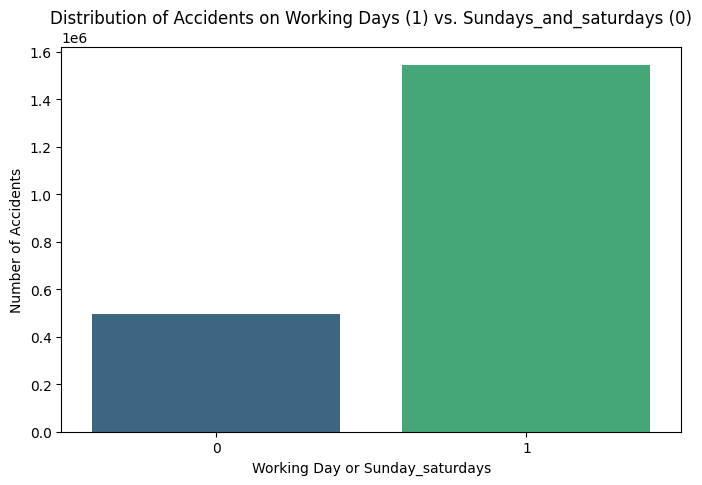

In [ ]:
# Visualize the distribution of accidents on working days vs. Sundays
df['Working_Day'] = df['Day_of_Week'].apply(lambda x: 1 if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 0)
plt.figure(figsize=(8, 5))
sns.countplot(x='Working_Day', data=df, palette='viridis')
plt.title('Distribution of Accidents on Working Days (1) vs. Sundays_and_saturdays (0)')
plt.xlabel('Working Day or Sunday_saturdays')
plt.ylabel('Number of Accidents')
plt.show()

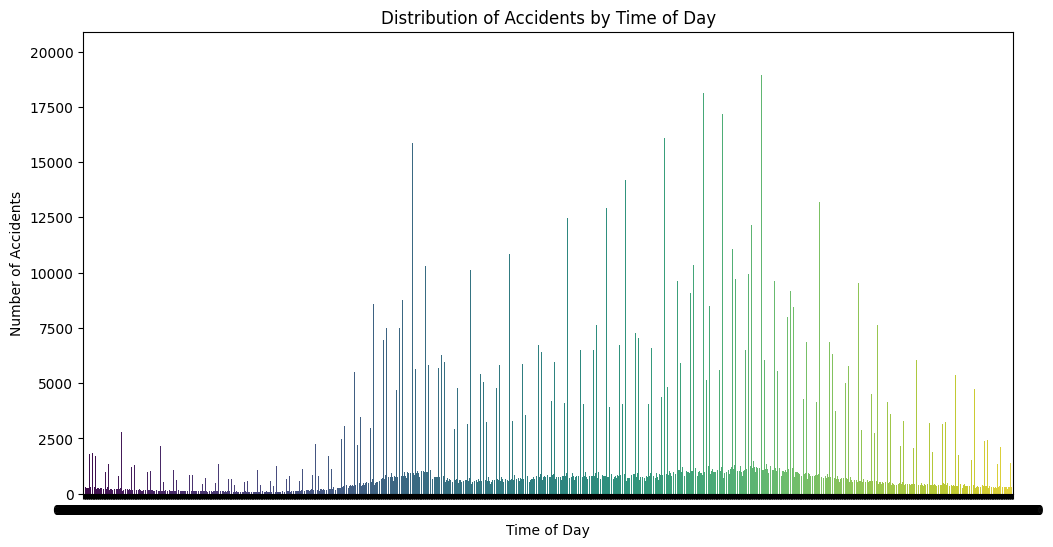

In [ ]:
# Sort the data by time
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time
df_sorted = df.sort_values(by='Time')

# Visualize the distribution of accidents by time of day
plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=df_sorted, palette='viridis')
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
xticks=ax.xaxis.get_major_ticks()
for i in range(len(xticks)):
    if i%2==1:
        xticks[i].set_visible(False)

# plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better readability
# plt.tight_layout()
plt.show()


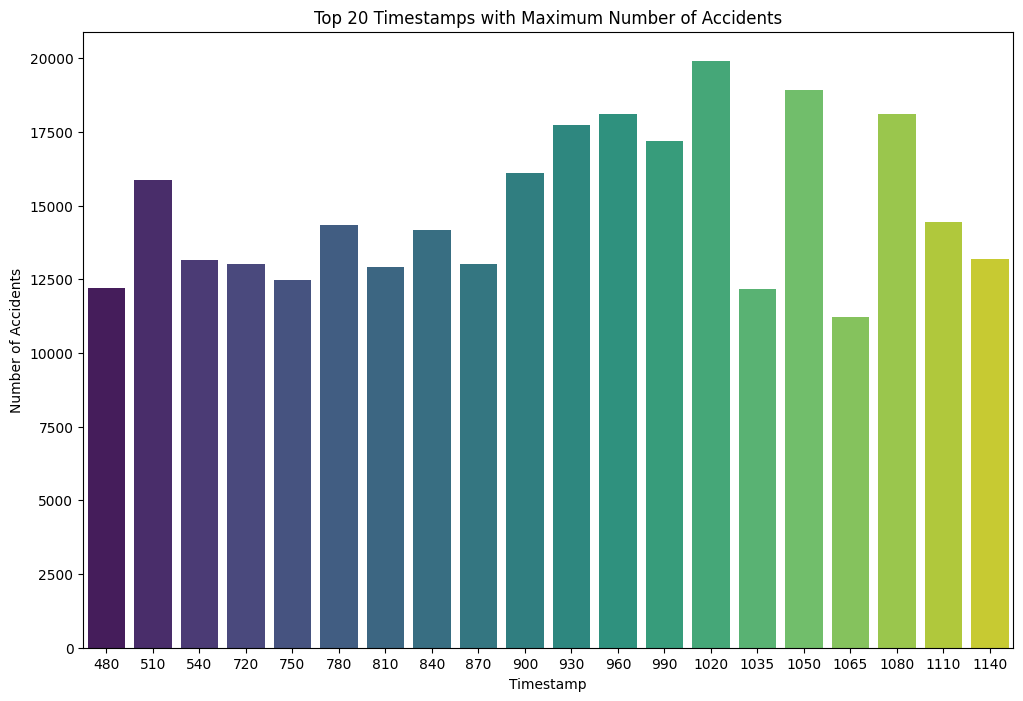

In [ ]:


# Assuming your dataset is named 'accidents'
# Replace 'df' with 'accidents' in the code
df = accidents.copy()  # Create a copy to avoid modifying the original data

# Convert 'Time' column to datetime
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')  # Convert to datetime, handle errors by setting invalid entries to NaT

# Drop rows with missing or invalid time values
df = df.dropna(subset=['Time'])

# Extract hour and minute from the 'Time' column
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Create a new column 'Timestamp' combining hour and minute
df['Timestamp'] = df['Hour'] * 60 + df['Minute']

# Find the top 20 timestamps with the maximum number of accidents
top20_timestamps = df['Timestamp'].value_counts().head(20)

# Plot the top 20 timestamps
plt.figure(figsize=(12, 8))
sns.barplot(x=top20_timestamps.index, y=top20_timestamps.values, palette='viridis')
plt.title('Top 20 Timestamps with Maximum Number of Accidents')
plt.xlabel('Timestamp')
plt.ylabel('Number of Accidents')
plt.show()


The observation that the majority of accidents occur in the evening, mainly after office hours, may be influenced by several factors. While it's challenging to pinpoint specific reasons without detailed analysis, some probable contributing factors could include:

Rush Hour Traffic: The evening hours coincide with rush hour traffic when many people are commuting back home from work. The increased volume of vehicles on the road during this time can lead to a higher likelihood of accidents.

Fatigue and Distraction: After a full day of work, drivers may experience fatigue, leading to decreased alertness and slower reaction times. Additionally, drivers might be distracted as they decompress from the workday or engage in activities such as using mobile phones.

Reduced Visibility: Evening hours often coincide with reduced visibility, especially during dusk or darkness. Poor lighting conditions can contribute to accidents, and drivers might face challenges in seeing pedestrians, road signs, or other vehicles.

Weather Conditions: Weather conditions may vary during the evening, with factors like rain, fog, or low light affecting road conditions. Adverse weather can contribute to accidents if drivers are not adequately prepared.

Increased Speeds: In some cases, drivers may tend to drive faster during the evening, especially on highways with lighter traffic. Higher speeds can increase the severity of accidents.

Alcohol Impairment: After work hours, there may be an increased likelihood of social gatherings or events where alcohol consumption occurs. Driving under the influence of alcohol can significantly contribute to accidents.

Late night drunk parties

To understand the specific reasons for the observed pattern, a more in-depth analysis, such as examining accident reports, considering road infrastructure, studying driver behaviors, and assessing local factors, would be required.

**For some reason the highest number of accidents occur on Friday .
We cant comment about the exact reason , since we dont have enough data for that but we can find what aur major zones of these accidents.**

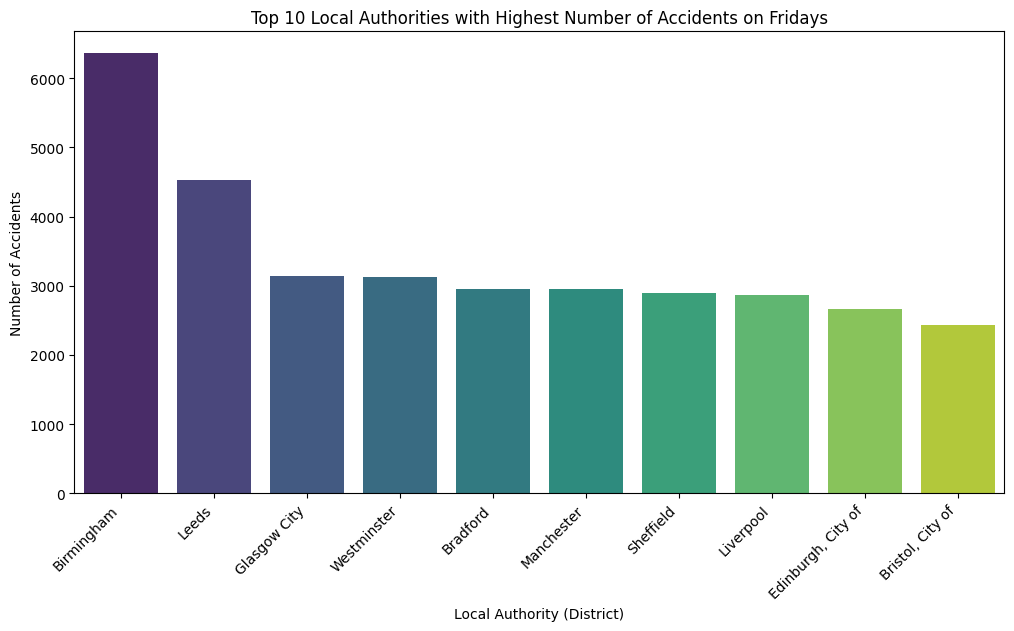

In [ ]:
friday_accidents = accidents[accidents['Day_of_Week'] == 'Friday']


region_accidents = friday_accidents.groupby('Local_Authority_(District)').size().reset_index(name='Number_of_Accidents')

region_accidents = region_accidents.sort_values(by='Number_of_Accidents', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Local_Authority_(District)', y='Number_of_Accidents', data=region_accidents.head(10), palette='viridis')
plt.title('Top 10 Local Authorities with Highest Number of Accidents on Fridays')
plt.xlabel('Local Authority (District)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.show()

**Lets see whether Scotland is the major zone for accidents or not**

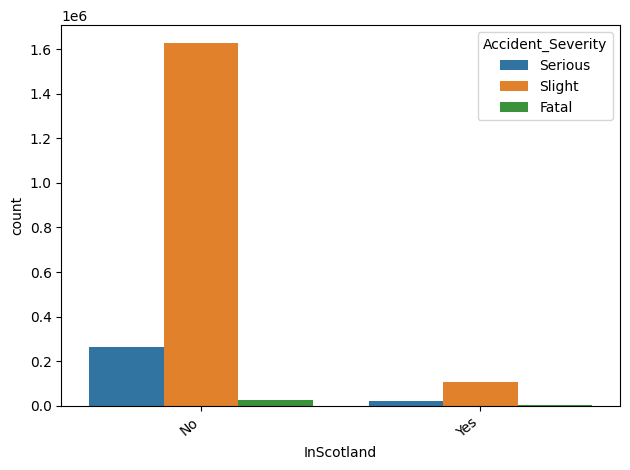

In [ ]:
ax = sns.countplot(accidents_df,x="InScotland",hue = "Accident_Severity")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

Though Scotland covers 1/3rd of UK the number of accidents in Scotland are pretty low.

Conclusion -- >

Based on te information available in our accidents data set we  found that rain , wet and damp road conditions are one of the major contributers of accidents .


Also time and week days somewhat determine the accident frequencies. Because major number of accidents are taking place on week days after office hours.